In [ ]:
# VAE w/o correlation regularization for BC
# archetype
# Ec as W

# redo simulation test of archetypes at gene level
# add correlation estimate (test if PBMC capture high and one-to-one mapping of corrleation)
# add pseudospots more real (STsimulate, or STdeconvolve simulation data instead of simple archetypes to achieve diganal pattern, to increase power of pseudospots)

In [1]:
# load modules
import os
import sys
import gzip
import numpy as np
import scipy.stats as stats
import pandas as pd
import pickle
import anndata
import scanpy as sc
import scipy
import seaborn as sns

from ST_simulation import *

In [2]:
import phenograph # install from https://github.com/jacoblevine/PhenoGraph
import collections
from scipy.io import mmread,mminfo
from sklearn.decomposition import PCA

# Plotting imports
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#cell_dic
markers_df = pd.read_csv('/Users/xueerchen/Documents/YeMac/visium_bc/pbmc_markers.csv')#pd.read_csv('pbmc_markers_sele.csv')#pd.read_csv('/Users/xueerchen/Documents/spatial/bc/Tcellsignatures_june2020.csv')##('mouse_brain_marker_gene-SH.csv')
cells = markers_df.columns.values
marker_genes = []
#cell_dic = {}
cell_dic_plot = {}
for c in cells:
    cc = np.array(markers_df[c].values.tolist())
    marker_genes = np.append(marker_genes,[x for x in cc if str(x) != 'nan'])
    #cell_dic[c] = [x for x in cc if str(x) != 'nan']
    cell_dic_plot[c] = [x for x in cc if str(x) != 'nan']
   

In [4]:
cell_dic_plot.keys()

dict_keys(['B_cell', 'CD14+_Monocyte', 'CD4+_T-cell', 'CD8+_T-cell', 'Dendritic_cell', 'FCGR3A+_Monocyte', 'HEK293T_cell', 'Megakaryocyte', 'NK_cell'])

In [5]:
#write.csv(t(exp_df),'~/Downloads/ST_simulation-master/pbmc/Smart-Seq2_exp.csv')
#write.csv(meta_df,'~/Downloads/ST_simulation-master/pbmc/Smart-Seq2_meta.csv')


In [53]:

comp_df = pd.read_csv('/Users/xueerchen/Documents/YeMac/visium_bc/pbmc_benchmark_spot_ct_df.csv',index_col=0)#pd.read_csv('../ST_simulation-master/synthetic_ST_seed466_1_composition.csv',index_col=0)

exp_df = pd.read_csv('/Users/xueerchen/Documents/YeMac/visium_bc/pbmc_benchmark_spot_exp_df.csv',index_col=0)



comp_df = comp_df.fillna(0)
comp_df.index


In [54]:
comp_df_sele = comp_df
exp_df_sele = exp_df
#comp_df_sele = comp_df.iloc[comp_df.index[comp_df.sum(axis=1) > 0]]
#comp_df_sele
#exp_df_sele = exp_df.iloc[comp_df_sele.index]#exp_df.iloc[comp_df.columns[comp_df.sum(axis=0) > 0]]
print(exp_df_sele.shape)


(6000, 23381)


In [9]:
exp_df_sele[exp_df_sele.columns.intersection(set(marker_genes))].to_csv('exp_markers_df_gsva_pbmc_x.csv')
#exp_df_sele[exp_df_sele.columns.intersection(set(marker_genes))].to_csv('exp_markers_df_gsva_pbmc_quartz.csv')

     0
s1  s1
s2  s2
s3  s3
s4  s4
s5  s5


/Users/xueerchen/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/xueerchen/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/xueerchen/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

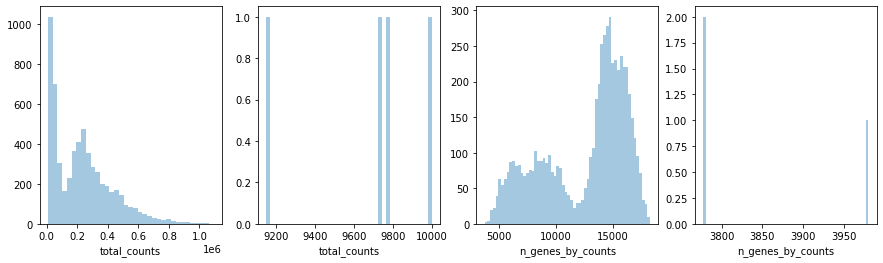

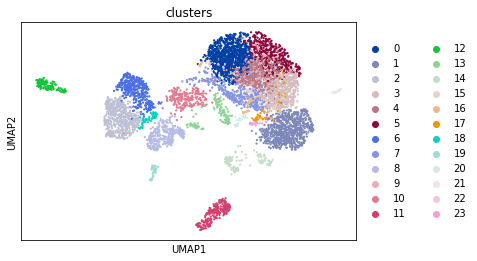

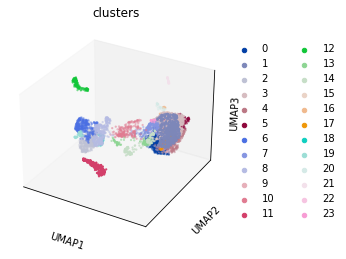

In [10]:
spot_df = pd.DataFrame(exp_df_sele.index,index=exp_df_sele.index)
#tmp = pd.DataFrame(adata.X,index=adata.obs_names,columns=adata.var_names)
print(spot_df.head())

gene_df = pd.DataFrame(exp_df_sele.columns,index=exp_df_sele.columns)
#tmp = pd.DataFrame(adata.X,index=adata.obs_names,columns=adata.var_names)
gene_df.head()

adata = sc.AnnData(exp_df_sele.values, obs=spot_df, var=gene_df)

#sc.pp.pca(adata_t_tpm)
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)


sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=5000, inplace=True)


fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")


sc.pl.umap(adata, color=["clusters"], wspace=0.4)


sc.tl.umap(adata,n_components=3)
sc.tl.leiden(adata, key_added="clusters")
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["clusters"], wspace=0.4,projection='3d')

In [16]:
#gsva_scores1 = pd.read_csv('~/Downloads/bc_visium_mod/markers_gsva_pbmc_quartz.csv',index_col=0)
#gsva_scores2 = pd.read_csv('~/Downloads/bc_visium_mod/markers_gsva_pbmc_quartz.csv',index_col=0)
#gsva_scores3 = pd.read_csv('~/Downloads/bc_visium_mod/markers_gsva_pbmc_quartz.csv',index_col=0) # for training BCE loss
#gsva_scores
gsva_scores1 = pd.read_csv('~/Downloads/bc_visium_mod/markers_gsva_pbmc_x.csv',index_col=0)
gsva_scores2 = pd.read_csv('~/Downloads/bc_visium_mod/markers_gsva_pbmc_x.csv',index_col=0)
gsva_scores3 = pd.read_csv('~/Downloads/bc_visium_mod/markers_gsva_pbmc_x.csv',index_col=0) # for training BCE loss


for i in comp_df_sele.columns:#gsva_scores1.columns:
    
    gsva_scores2.loc[gsva_scores1[i] >= gsva_scores1[i].quantile(0.9999), i] = 1#0.9999   
    gsva_scores2.loc[(gsva_scores1[i] > gsva_scores1[i].quantile(0.99))&(gsva_scores1[i] < gsva_scores1[i].quantile(0.9999)), i] = 2
    gsva_scores2.loc[gsva_scores1[i] < gsva_scores1[i].quantile(0.99), i] = 0


    gsva_scores3.loc[gsva_scores1[i] >= gsva_scores1[i].quantile(0.7), i] = 1#0.9999   
    
    gsva_scores3.loc[gsva_scores1[i] < gsva_scores1[i].quantile(0.7), i] = 0
    
    #gsva_scores2.loc[gsva_scores1[i] >= gsva_scores1[i].quantile(0.999), i] = 1#0.9999   
    #gsva_scores2.loc[(gsva_scores1[i] > gsva_scores1[i].quantile(0.99))&(gsva_scores1[i] < gsva_scores1[i].quantile(0.999)), i] = 2
    #gsva_scores2.loc[gsva_scores1[i] < gsva_scores1[i].quantile(0.99), i] = 0




In [17]:
arches_val_ct = []

arch_spots_ct = []
#archs = []
spot_sizes_ct = []
cts_ct = []
#archs = []
for i in adata.obs.index:
    ds = gsva_scores2.loc[i,:]
    mask = ds == 1
    tmp = ds.loc[mask].index
    if len(tmp)==1:
        ct = tmp.values
        arches_val_ct = np.append(arches_val_ct,ct)
        arch_spots_ct = np.append(arch_spots_ct,i)
        #archs = np.append(archs,int(ct.split('_')[1]))
        spot_sizes_ct = np.append(spot_sizes_ct,500)
        
        
    else:
        arches_val_ct = np.append(arches_val_ct,'nan')
        spot_sizes_ct = np.append(spot_sizes_ct,50)
        
# nn
arches_nn_ct = []
arch_nn_spots_ct = []

for i in adata.obs.index:
    ds = gsva_scores2.loc[i,:]
    mask = ds == 2
    tmp = ds.loc[mask].index
    if len(tmp)==1:
        ct = tmp.values
        arches_nn_ct = np.append(arches_nn_ct,ct)
        arch_nn_spots_ct = np.append(arch_nn_spots_ct,i)
        
    else:
        arches_nn_ct = np.append(arches_nn_ct,'nan')
        
 




In [18]:
adata.obs['arches_val_ct'] = arches_val_ct#adA.obs['arches_nn_val'] = arches_val
adata.obs['arches_nn_ct'] = arches_nn_ct

In [19]:
adata.obs['arches_val_ct'].value_counts()

nan                 5991
FCGR3A+_Monocyte       1
B_cell                 1
Dendritic_cell         1
NK_cell                1
CD14+_Monocyte         1
CD8+_T-cell            1
Megakaryocyte          1
HEK293T_cell           1
CD4+_T-cell            1
Name: arches_val_ct, dtype: int64

In [20]:
adata.obs['arches_nn_ct'].value_counts()

nan                 5527
B_cell                59
HEK293T_cell          59
CD4+_T-cell           58
Megakaryocyte         57
FCGR3A+_Monocyte      56
Dendritic_cell        55
CD14+_Monocyte        53
NK_cell               38
CD8+_T-cell           38
Name: arches_nn_ct, dtype: int64

In [21]:
dg = adata.obs['arches_nn_ct'].value_counts()
mask = dg > 1
names = dg.loc[mask].index.values
names = names[names!='nan']
names

array(['B_cell', 'HEK293T_cell', 'CD4+_T-cell', 'Megakaryocyte',
       'FCGR3A+_Monocyte', 'Dendritic_cell', 'CD14+_Monocyte', 'NK_cell',
       'CD8+_T-cell'], dtype=object)

In [22]:
#tmp = pd.DataFrame(adA.X,index=adA.obs.index.values,columns=adA.var.index.values)
tmp = exp_df_sele
tmp.index.name = 'cell_id'#tmp.index.name = 'cell_id'
#print(tmp.shape)
genes_sele = np.append(adata.var.loc[adata.var['highly_variable'] == True].index.values,marker_genes)
dt = tmp[tmp.columns.intersection(genes_sele)]
dt.shape


genes = dt.columns.values

#valid_cell_dic_all = {}

valid_cell_dic_ct = {}
for c,m1 in cell_dic_plot.items():
    m2 = [i for i in m1 if i in genes]
    #print(c,m2)
    if len(m2)>0:
        valid_cell_dic_ct[c] = m2
        #valid_cell_dic_all[c] = m2



In [23]:
valid_cell_dic_ct.keys()

dict_keys(['B_cell', 'CD14+_Monocyte', 'CD4+_T-cell', 'CD8+_T-cell', 'Dendritic_cell', 'FCGR3A+_Monocyte', 'HEK293T_cell', 'Megakaryocyte', 'NK_cell'])

In [24]:
tmp = pd.DataFrame(adata.X,index=adata.obs.index.values,columns=adata.var.index.values)
tmp.index.name = 'cell_id'
print(tmp.shape)
dt = tmp[tmp.columns.intersection(adata.var.loc[adata.var['highly_variable'] == True].index.values)]
print(dt.shape)

(6000, 23381)
(6000, 5000)


In [25]:
# fix prior var calculation
# var: average expression of signature genes, var across NN
vars_arch_ct = []
tt = adata.obs
ttt = np.array(tt['arches_nn_ct'].unique())
#x[~numpy.isnan(x)]
for i in names:#comp_df.columns:#valid_cell_dic_ct.keys():#ttt[~np.isnan(ttt)]:#cell_dic_plot.keys():
    
    mask = tt['arches_nn_ct']==i
    spots = tt.loc[mask].index.values#adA.obs.loc[:,dA.obs.loc['arches_nn']].index.values()# df1.loc[:, df1.loc['a'] > 0]
    genes_sele = cell_dic_plot[i]
    xx = np.log1p(exp_df_sele)
    var_n = np.sqrt(dt.loc[spots][dt.columns.intersection(genes_sele)].sum(axis=1).var())#np.sqrt(xx.loc[spots][xx.columns.intersection(genes_sele)].sum(axis=1).var())#np.sqrt(exp_df_sele.loc[spots][exp_df_sele.columns.intersection(genes_sele)].sum(axis=1).var())
    vars_arch_ct = np.append(vars_arch_ct,var_n)
    
vars_arch_ct

array([70.96331024,  4.45963621, 43.43448257, 17.45959091, 61.91752243,
       46.84486389, 48.17546844, 61.98635101, 59.7516861 ])

In [26]:
# degs 
from scipy import stats

In [27]:
from __future__ import print_function, division

import os
GPU_id = 0
os.environ['CUDA_VISIBLE_DEVICES'] = str(GPU_id)
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt

#import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader
#from torchvision import transforms, utils



# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [28]:
class visiumDataset(Dataset):

    def __init__(self, exp_mat, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.spot_gene_exp = exp_mat
        idx = self.spot_gene_exp.index
        x = self.spot_gene_exp.values
        #x = np.log1p(x)
        self.spot_gene_exp = pd.DataFrame(x, columns=self.spot_gene_exp.columns, index=idx)
            
        #self.root_dir = root_dir
        #self.transform = transform

    def __len__(self):
        return len(self.spot_gene_exp)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        sample = torch.Tensor(np.array(self.spot_gene_exp.iloc[idx,0:],dtype='float'))
        
        return sample





In [29]:
class VAE(nn.Module):
    def __init__(self,H,M,vars_arch):
        super(VAE,self).__init__()

        #Latent View
        #self.lv = nn.Linear(50,20)
        
        self.vars_arch = torch.from_numpy(vars_arch).float()
        
        self.encoder = nn.Sequential(
            nn.Linear(M,40),#nn.Linear(M,400),
            nn.ReLU(),
            
            nn.Linear(40,H),#nn.Linear(400,H)
            #nn.ReLU(),
        )
        
         # distribution parameters
        # bottleneck size is 20
        #self.fc_mu = nn.Linear(50, 20)
        #self.fc_var = nn.Linear(50, 20)
        
        self.fc_mu_w = torch.nn.Parameter(torch.rand(H,H))
        self.fc_mu_b = torch.nn.Parameter(torch.rand(H))
        
        #self.fc_var_w = torch.nn.Parameter(torch.rand(H,H))
        #self.fc_var_b = torch.nn.Parameter(torch.rand(H))
        #self.ct_vars = torch.nn.Parameter(torch.tensor([0.89681379, 0.74543968, 1.        , 0.32596006, 0.38808593,0.74543968]))
        
        self.decoder = nn.Sequential(
            nn.Linear(H,H),#50
            nn.ReLU(),
            nn.Linear(H,40),#nn.Linear(H,400)
            nn.ReLU(),
            nn.Linear(40,M),#nn.Linear(400,6000)
        )
        
        # distribution parameters
        # bottleneck size is 20
        #self.fc_mu = nn.Linear(100, 20)
        #self.fc_var = nn.Linear(100, 20)

        # for the gaussian likelihood ????
        self.log_scale = nn.Parameter(torch.Tensor([0.0]))
        
        
    def forward(self, x, sample_cell_genes):
        # encode x to get the mu and variance parameters
        x_encoded = self.encoder(x)
        x_sample_cell = self.encoder(sample_cell_genes)#torch.eye(len(valid_cell_dic)).cuda()#self.encoder(sample_cell_genes)#*torch.eye(len(valid_cell_dic)).cuda()# multiply by identity mat or assign one identity mat directly
        
        mu = torch.matmul(x_encoded, self.fc_mu_w) + self.fc_mu_b#torch.matmul(x_encoded, self.fc_mu_w+x_sample_cell.T) + self.fc_mu_b
        #log_var = torch.matmul(x_encoded, self.fc_var_w) + self.fc_var_b#torch.matmul(x_encoded, self.fc_var_w+x_sample_cell.T) + self.fc_var_b
       
        mu_samp = torch.matmul(x_sample_cell, self.fc_mu_w) + self.fc_mu_b
        
        tt = torch.tensor(self.vars_arch)#self.vars_arch
        #print(len(tt))
        std_samp = tt.repeat(mu_samp.shape[0], 1)#0.01*torch.ones(mu_samp.shape[0],mu_samp.shape[1]).cuda()#tt.repeat(mu_samp.shape[0], 1)#torch.exp(log_var_samp / 2)#0.1*torch.ones(mu_samp.shape[0],mu_samp.shape[1])#torch.exp(log_var_samp / 2)
        # sample z from q
        std = tt.repeat(mu.shape[0], 1)
        
        #std_samp = self.ct_vars.repeat(mu_samp.shape[0], 1)#torch.exp(log_var_samp / 2)#0.01*torch.ones(mu_samp.shape[0],mu_samp.shape[1])#tt.repeat(mu_samp.shape[0], 1)#torch.exp(log_var_samp / 2)#0.01*torch.ones(mu_samp.shape[0],mu_samp.shape[1])#tt.repeat(mu_samp.shape[0], 1)#torch.from_numpy(np.repeat(vars_arch,mu_samp.shape[0],axis=0).reshape((mu_samp.shape[1], mu_samp.shape[0])).T)#0.01*torch.ones(mu_samp.shape[0],mu_samp.shape[1])#torch.exp(log_var_samp / 2)
        # sample z from q
        #std = self.ct_vars.repeat(mu.shape[0], 1)#torch.exp(log_var / 2)#0.01*torch.ones(mu.shape[0],mu.shape[1])#tt.repeat(mu.shape[0], 1)#torch.exp(log_var / 2)#0.01*torch.ones(mu.shape[0],mu.shape[1])#tt.repeat(mu.shape[0], 1)#torch.from_numpy(np.repeat(vars_arch,mu.shape[0],axis=0).reshape((mu.shape[1], mu.shape[0])).T)#0.01*torch.ones(mu.shape[0],mu.shape[1])#torch.exp(log_var / 2)
        #eps = torch.randn_like(std)
        #z = mu + (eps*std)
        q = torch.distributions.Normal(mu, std)#torch.distributions.Normal(mu, 0.1*torch.ones(mu.shape[0],mu.shape[1]))#(mu, std)
        z = q.rsample()
        
        q_samp = torch.distributions.Normal(mu_samp, std_samp)#(mu_samp, 0.1*torch.ones(mu_samp.shape[0],mu_samp.shape[1]))#(mu_samp, std_samp)
        z_samp = q_samp.rsample()
        
        #z_samp = torch.eye(len(valid_cell_dic)).cuda()#np.identity(len(valid_cell_dic))

        # decoded 
        x_samp_hat = vae.decoder(z_samp)
        x_hat = vae.decoder(z) #?? self.
        return x_encoded,x_sample_cell,x_hat,x_samp_hat,z,z_samp,mu,std,mu_samp,std_samp
        

In [30]:
def gaussian_likelihood(mean, logscale, sample):
    scale = torch.exp(logscale)
    dist = torch.distributions.Normal(mean, scale)
    log_pxz = dist.log_prob(sample)
    return log_pxz.sum(dim=1)

def kl_divergence(z, mu, std):
    # --------------------------
    # Monte carlo KL divergence
    # --------------------------
    # 1. define the first two probabilities (in this case Normal for both)
    p = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(std))
    q = torch.distributions.Normal(mu, std)

    # 2. get the probabilities from the equation
    log_qzx = q.log_prob(z)
    log_pz = p.log_prob(z)

    # kl
    kl = (log_qzx - log_pz)
    kl = kl.sum(-1)
    return kl

In [31]:
y_nn = pd.get_dummies(adata.obs.loc[arch_nn_spots_ct,'arches_nn_ct'])
#y_nn=y_nn.drop(columns=['nan'])
print(y_nn.head())

     B_cell  CD14+_Monocyte  CD4+_T-cell  CD8+_T-cell  Dendritic_cell  \
s1        0               0            0            0               0   
s22       0               0            0            0               0   
s25       1               0            0            0               0   
s27       0               0            0            0               0   
s56       0               1            0            0               0   

     FCGR3A+_Monocyte  HEK293T_cell  Megakaryocyte  NK_cell  
s1                  1             0              0        0  
s22                 0             0              1        0  
s25                 0             0              0        0  
s27                 0             1              0        0  
s56                 0             0              0        0  


In [32]:
y_ct = gsva_scores3.loc[arch_nn_spots_ct,names]#gsva_scores3.loc[arch_nn_spots_ct,:]#gsva_scores3.loc[arch_spots_ct,:]#arch_nn_spots_ct
#y_ct=y_ct.drop(columns=['nan'])
print(y_ct.shape)
print(y_ct.head())

(473, 9)
     B_cell  HEK293T_cell  CD4+_T-cell  Megakaryocyte  FCGR3A+_Monocyte  \
s1      0.0           0.0          0.0            0.0               1.0   
s22     0.0           0.0          1.0            1.0               0.0   
s25     1.0           0.0          0.0            0.0               0.0   
s27     1.0           1.0          0.0            0.0               0.0   
s56     0.0           0.0          0.0            1.0               1.0   

     Dendritic_cell  CD14+_Monocyte  NK_cell  CD8+_T-cell  
s1              1.0             1.0      0.0          0.0  
s22             0.0             0.0      0.0          1.0  
s25             1.0             0.0      0.0          0.0  
s27             0.0             0.0      0.0          0.0  
s56             1.0             1.0      0.0          0.0  


In [33]:

#dt = exp_df_sele[exp_df_sele.columns.intersection(adata.var.loc[adata.var['highly_variable'] == True].index.values)]#tmp[tmp.columns.intersection(adA.var.loc[adA.var['highly_variable'] == True].index.values)]
vd = visiumDataset(exp_mat=dt)


import matplotlib.pyplot as plt
#plt.hist(dt.sum(axis=1))
#plt.show()

batch_size = 128

train_loader = torch.utils.data.DataLoader(
                 dataset=vd,#dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True,
                 num_workers=8,
                 #prefetch_factor=64,
)

x = next(iter(train_loader))
x.shape

print(x.min(), x.max(), x.mean())

x.shape

tensor(0.) tensor(9.5575) tensor(1.0640)


torch.Size([128, 5000])

In [34]:
%%time

# add loss for sample spots
# move data to gpu
z_sample_cell_label = torch.from_numpy(y_ct[names].to_numpy())#torch.from_numpy(y_ct[comp_df.index].to_numpy())#torch.from_numpy(y_ct[valid_cell_dic_ct.keys()].to_numpy())#torch.from_numpy(y_nn[valid_cell_dic_ct.keys()].to_numpy())##torch.from_numpy(y_nn[y.columns].to_numpy())#torch.range(0,len(archs_sele)-1).long()#torch.Tensor(archs_sele).long()
H=len(vars_arch_ct)+0#int(z_sample_cell_label.max())+1#no_c#len(valid_cell_dic)
M = dt.shape[1]
vae = VAE(H,M,vars_arch_ct)
print(vae)
vae_gpu = vae#.cuda()
optimizer = torch.optim.Adam(vae_gpu.parameters(),lr=1e-3)
#a.repeat(3)
 
xx = dt.loc[arch_nn_spots_ct]#dt.loc[maxValueIndex]#pd.DataFrame.sparse.from_spmatrix(arch_spots_exp.X)
#xx.columns = adata.var.index.values

sample_signatures = xx[dt.columns].to_numpy()#fix_cell_genes(len(cell_gene_ids.keys()),M)#fix_cell_genes(N=len(cell_gene_ids.keys()))#sample_cell_genes(20)
sample_signatures_r = sample_signatures#np.repeat(sample_signatures, repeats=1, axis=0)
sample_signatures_r = torch.from_numpy(sample_signatures_r).float()#.cuda()


EPOCHS = 200
for epoch in range(EPOCHS):
    losses = []
    elbos = []
    corr_ls = []
    ces = []
    for batch_idx,data in enumerate(train_loader):
        #data = torch.autograd.Variable(data)
        #data = data#.cuda()
        #sample_signatures = fix_cell_genes(len(cell_gene_ids.keys()),M)#fix_cell_genes(N=len(cell_gene_ids.keys()))#sample_cell_genes(20)
        #sample_signatures_r = np.repeat(sample_signatures, repeats=5, axis=0)
        #sample_signatures_r = torch.from_numpy(sample_signatures_r).float().cuda()

        optimizer.zero_grad()
        #x_encoded,x_sample_cell,x_hat,z,mu,std
        #x_encoded,x_sample_cell,x_hat,x_samp_hat,z,z_samp,mu,std
        x_encoded,x_sample_cell,x_hat,x_samp_hat,z,z_samp,mu,std,mu_samp,std_samp = vae_gpu(data,sample_signatures_r)
        
        # reconstruction loss
        #recon_loss = F.mse_loss(x_hat,data)
        #recon_loss = (x_hat - data).pow(2).mean(dim=1)
        recon_loss = gaussian_likelihood(x_hat, vae_gpu.log_scale, data)
        recon_loss_samp = gaussian_likelihood(x_samp_hat, vae_gpu.log_scale, sample_signatures_r)
        
        kl = kl_divergence(z, mu, std)
        #kl = torch.mean(-0.5 * torch.sum(1 + std - mu ** 2 - std.exp(), dim = 1), dim = 0)
        # elbo
        beta = 1
        elbo = (beta*kl - recon_loss)#(kl - recon_loss)#try beta vae
        elbo = elbo.mean()
        
        #ce = F.cross_entropy(mu_samp, z_sample_cell_label)
        #bn_samp = mu_samp.cpu().detach().numpy()
        #bn_samp_s = softmax(bn_samp[:,0:len(vars_arch_ct)], axis=1)
        ce_func = nn.BCEWithLogitsLoss()#F.cross_entropy(mu_samp, z_sample_cell_label)
        #ce = ce_func(mu_samp[:,0:len(vars_arch_ct)],z_sample_cell_label.float())#ce_func(mu_samp,z_sample_cell_label.float())
        ce = ce_func(x_sample_cell[:,0:len(vars_arch_ct)],z_sample_cell_label.float())#ce_func(mu_samp,z_sample_cell_label.float())


        
        loss = elbo + ce*200#*50
        
        ces.append(ce.item())#ces.append(ce.cpu().detach().item())
        
        elbos.append(elbo.item())#elbos.append(elbo.cpu().detach().item())
        #corr_ls.append(loss_corr.cpu().detach().item())
        #losses.append(loss.cpu().detach().item())
        
        loss.backward()
        optimizer.step()

    #l = f'Loss:{np.mean(losses):.2f}'
    el = f'Elbo Loss:{np.mean(elbos):.2f}'
    cel = f'Cross Entropy Loss:{np.mean(ces):.2f}'
    #cl = f'Corr Loss:{np.mean(corr_ls):.2f}'
    #print(f'\r Train Epoch: {epoch+1}/{EPOCHS} {l} {el} {cl}')
    print(f'\r Train Epoch: {epoch+1}/{EPOCHS} {el} {cel}')


VAE(
  (encoder): Sequential(
    (0): Linear(in_features=5000, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=9, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=9, out_features=9, bias=True)
    (1): ReLU()
    (2): Linear(in_features=9, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=5000, bias=True)
  )
)
 Train Epoch: 1/200 Elbo Loss:37822.19 Cross Entropy Loss:4.72
 Train Epoch: 2/200 Elbo Loss:22536.86 Cross Entropy Loss:2.39
 Train Epoch: 3/200 Elbo Loss:20253.67 Cross Entropy Loss:0.61
 Train Epoch: 4/200 Elbo Loss:19449.46 Cross Entropy Loss:0.49
 Train Epoch: 5/200 Elbo Loss:19075.62 Cross Entropy Loss:0.46
 Train Epoch: 6/200 Elbo Loss:18794.73 Cross Entropy Loss:0.43
 Train Epoch: 7/200 Elbo Loss:18625.88 Cross Entropy Loss:0.43
 Train Epoch: 8/200 Elbo Loss:18511.86 Cross Entropy Loss:0.40
 Train Epoch: 9/200 Elbo Loss:18327.21 Cross Entropy Loss:0.38
 Train Epoch: 10/200

In [35]:
alldata_loader = torch.utils.data.DataLoader(
                 dataset=vd,#dataset=train_set,
                 batch_size=len(vd),
                 #shuffle=True,
                 num_workers=8,
                 #prefetch_factor=64,
)





In [36]:
for batch_idx,alldata in enumerate(alldata_loader):
    print(batch_idx,alldata.size())     
    x_encoded,x_sample_cell,x_hat_all,x_samp_hat,z_all,z_samp,mu_all,std_all,mu_samp,std_samp = vae_gpu(alldata,sample_signatures_r)#vae_gpu(alldata.cuda(),sample_signatures_r) 

0 torch.Size([6000, 5000])


In [37]:
x_sample_cell

tensor([[ -7.8914, -12.9261,  -9.4131,  ...,  20.7932,  -5.5909, -14.5069],
        [-12.1388,  -5.1599,  45.3858,  ...,  -7.1982,  -3.7683,   7.3767],
        [ 33.9270, -18.6926, -10.6581,  ...,  -3.2845,  -8.5035, -20.0868],
        ...,
        [ -3.9485,  24.6040,   7.3385,  ...,  -5.9158,  -7.4504,  -5.4632],
        [ -5.7540, -14.0657,   7.2903,  ...,  -7.6771,  30.5893,  31.8770],
        [ -6.1707,  10.2287,  16.4949,  ...,  -6.2278,  -4.0971,   4.5815]],
       grad_fn=<AddmmBackward>)

In [38]:
print(x_encoded.max(),x_encoded.min())

tensor(50.2438, grad_fn=<MaxBackward1>) tensor(-33.9005, grad_fn=<MinBackward1>)


In [39]:
print(z_all.max(),z_all.min())

tensor(246.4231, grad_fn=<MaxBackward1>) tensor(-263.3257, grad_fn=<MinBackward1>)


In [40]:
print(mu_all.max(),mu_all.min())

tensor(33.8258, grad_fn=<MaxBackward1>) tensor(-38.0397, grad_fn=<MinBackward1>)


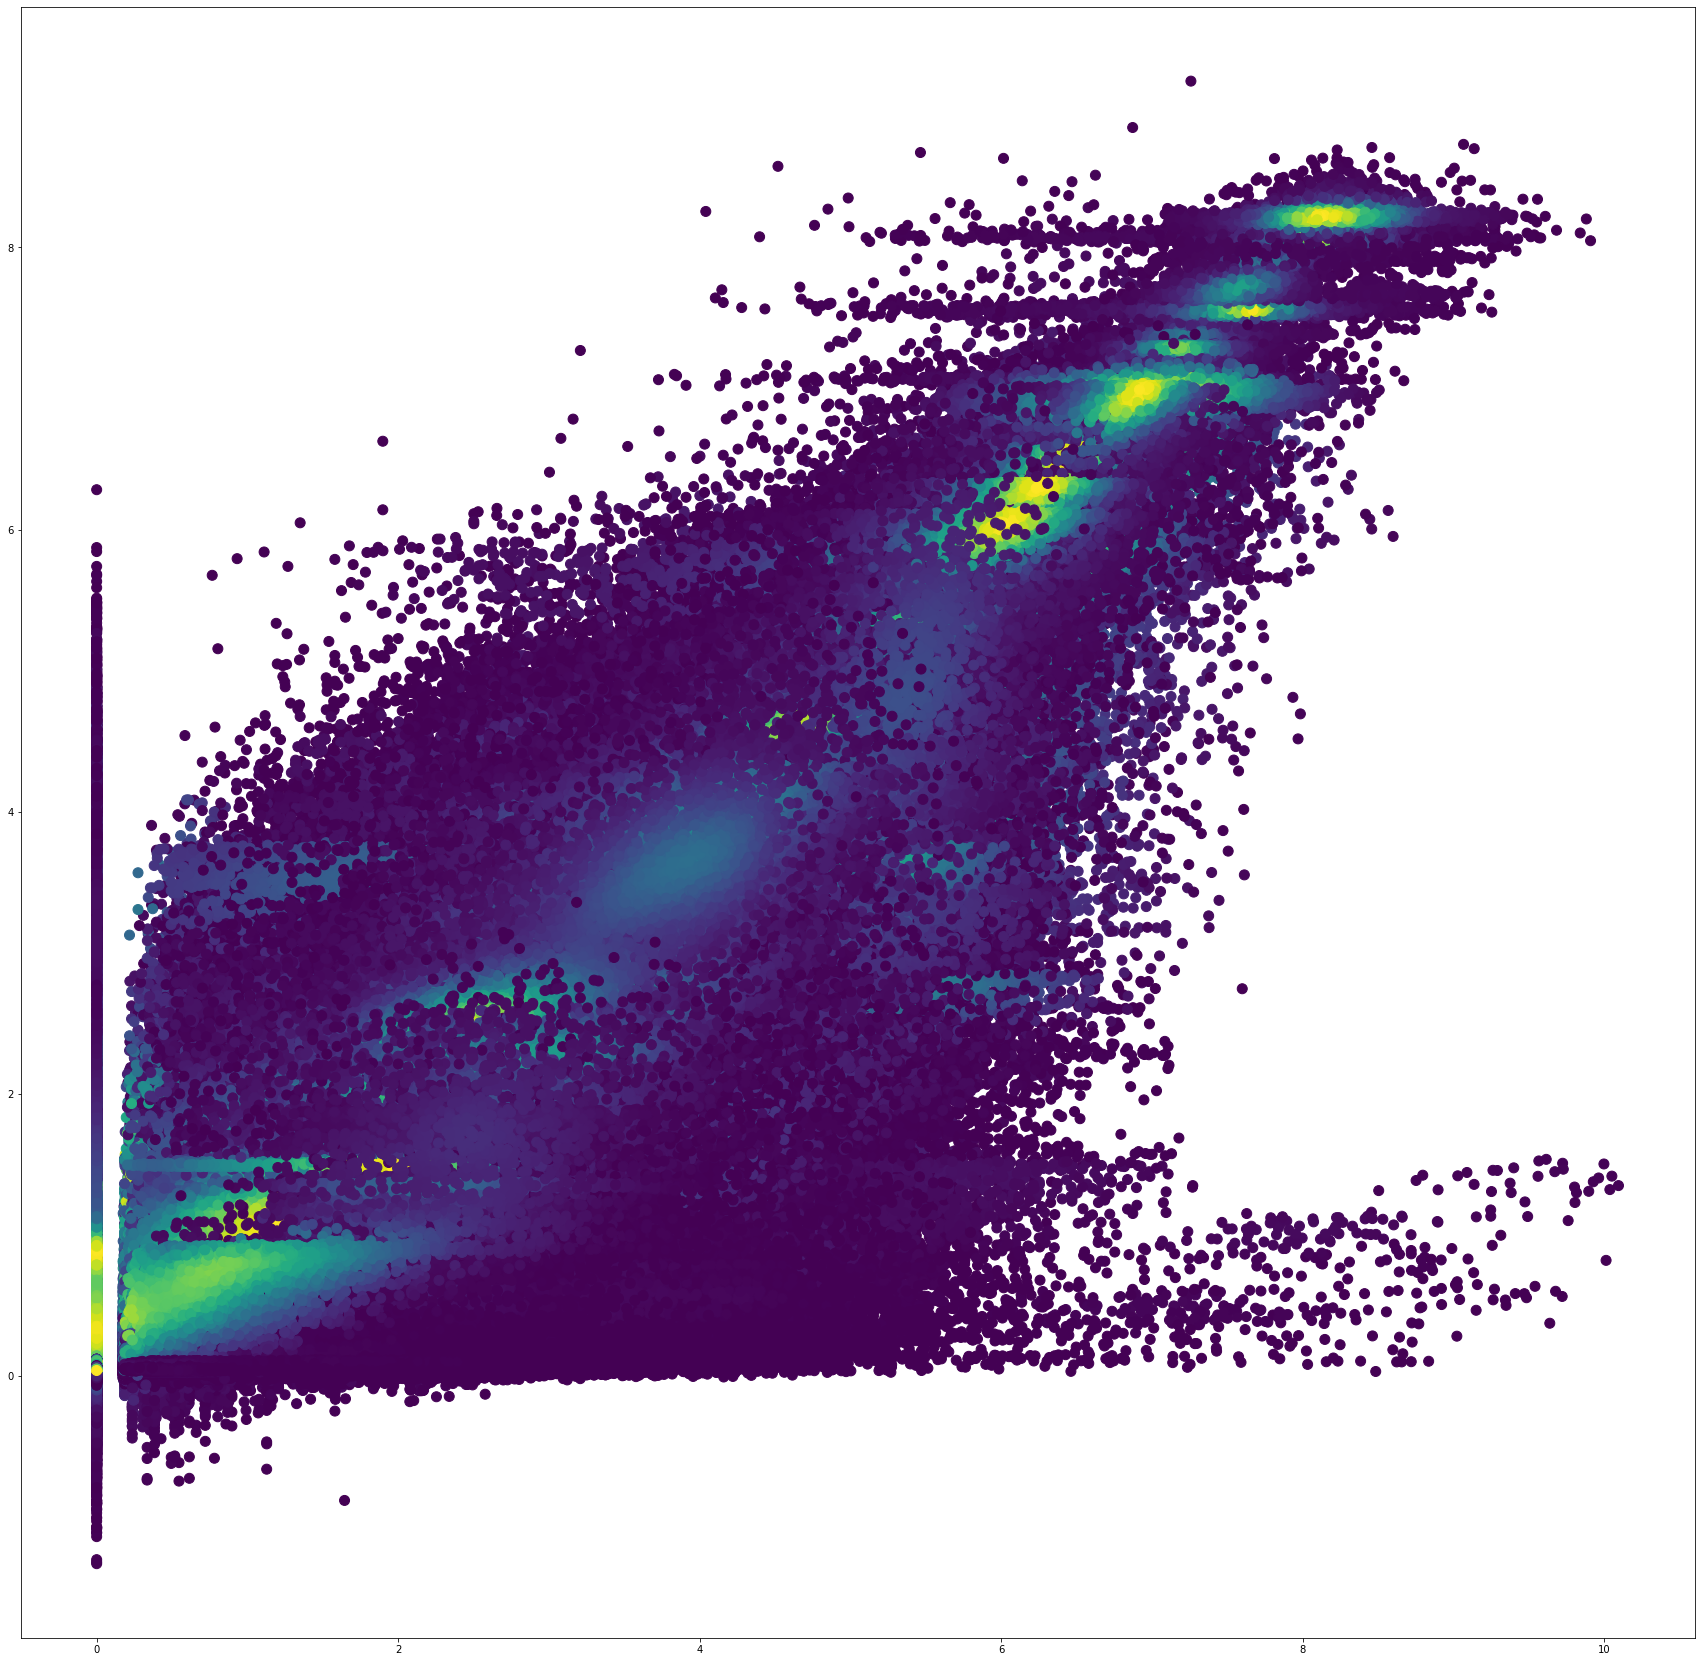

In [41]:
x_hat_df =pd.DataFrame(x_hat_all.cpu().detach().numpy())
x_hat_df.columns = dt.columns
x_hat_df

x_in = pd.DataFrame(alldata.cpu().detach().numpy())
x_in.columns = dt.columns

from scipy.stats import gaussian_kde
plt.rcParams["figure.figsize"] = (30, 30)
ax = plt.gca()
for i in dt.columns:
    #ax = plt.subplot(30,30,i+1)
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    xx = x_in[i].values#np.log1p(dt[i].values)
    yy = x_hat_df[i].values
    xy = np.vstack([xx,yy])
    z = gaussian_kde(xy)(xy)
    
    ax.scatter(xx, yy, c=z, s=100)
        #plt.scatter(dt[i].values, x_hat_df[i].values,color='red')
    



In [42]:
bn_all_np = mu_all.cpu().detach().numpy()
#bn_all_np = mu_all.cpu().detach().numpy()
#bn_all_np = z_all.cpu().detach().numpy()
bn_df = pd.DataFrame(bn_all_np)
bn_df.columns = ['bn'+str(i+1) for i in bn_df.columns]

(9, 9)


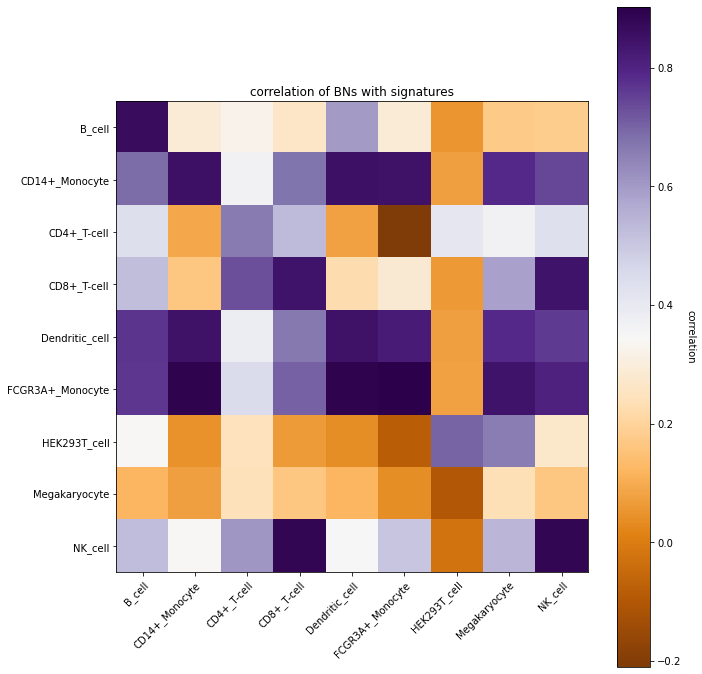

In [43]:
# cor based on pseudopots only
#x_encoded,x_sample_cell,x_hat_all,x_samp_hat,z_all,z_samp,mu_all,std_all,mu_samp,std_samp

# Declaring rows
N = len(gsva_scores1.columns.values[gsva_scores1.max(axis=0) > 0])#bn_df.shape[1]
  
# Declaring columns
M = len(valid_cell_dic_ct)
  
# Using * operator twice to initialize matrix
cor_bn_ct_marks = np.array([[0] * M] * N)
print(cor_bn_ct_marks.shape)
#res[0,0]
cor_bn_ct_df_marks = pd.DataFrame(cor_bn_ct_marks, columns = valid_cell_dic_ct.keys(),index = valid_cell_dic_ct.keys())#index = gsva_scores1.columns.values)
cor_bn_ct_df_marks.iloc[0,0]

#v3
for k in names:#valid_cell_dic_ct.keys():
    gs = valid_cell_dic_ct[k]
    #ttt = pd.concat([gsva_scores1[gsva_scores1.columns], dt.loc[arch_spots,dt.columns.intersection(gs)]], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)/dt.shape[0]], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], exp_mat[exp_mat.columns.intersection(gs)].sum(axis=1)], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)], axis=1)#pd.concat([bn_df[bn_df.columns[bn_df.max(axis=0) > 0]], dt[dt.columns.intersection(gs)].sum(axis=1)/dt.shape[0]], axis=1)
    ttt = pd.concat([gsva_scores1.loc[arch_nn_spots_ct], dt.loc[arch_nn_spots_ct,dt.columns.intersection(gs)]], axis=1)
    tt = ttt.corr()
    
    for j in names:#valid_cell_dic_ct.keys():#gsva_scores1.columns.values[gsva_scores1.max(axis=0) > 0]:
        data = np.array([tt[j].index,tt[j].tolist()])
        df = pd.DataFrame(data.T, columns = ['Name', 'cor_score']) 
        df.index = df['Name']
        cor_bn_ct_df_marks.loc[j,k] = df['cor_score'][df.index.intersection(gs)].max()#/len(gs)

plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots()
#cor_bn_ct_df_marks_n = cor_bn_ct_df_marks.dropna(axis='columns')
im = ax.imshow(cor_bn_ct_df_marks,#/cor_bn_ct_df_marks_n.max(axis=0),
               cmap="PuOr")

cbar = ax.figure.colorbar(im, ax=ax)#, **cbar_kw
cbar.ax.set_ylabel('correlation', rotation=-90, va="bottom")
ax.set_xticks(np.arange(len(cor_bn_ct_df_marks.columns)))
ax.set_yticks(np.arange(len(cor_bn_ct_df_marks.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(cor_bn_ct_df_marks.columns)
ax.set_yticklabels(cor_bn_ct_df_marks.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(cor_bn_ct_df.columns)):
#    for j in range(len(cor_bn_ct_df.index)):
#        text = ax.text(j, i, cor_bn_ct_df[i, j],
#                       ha="center", va="center", color="w")



ax.set_title("correlation of BNs with signatures")
fig.tight_layout()
plt.show()

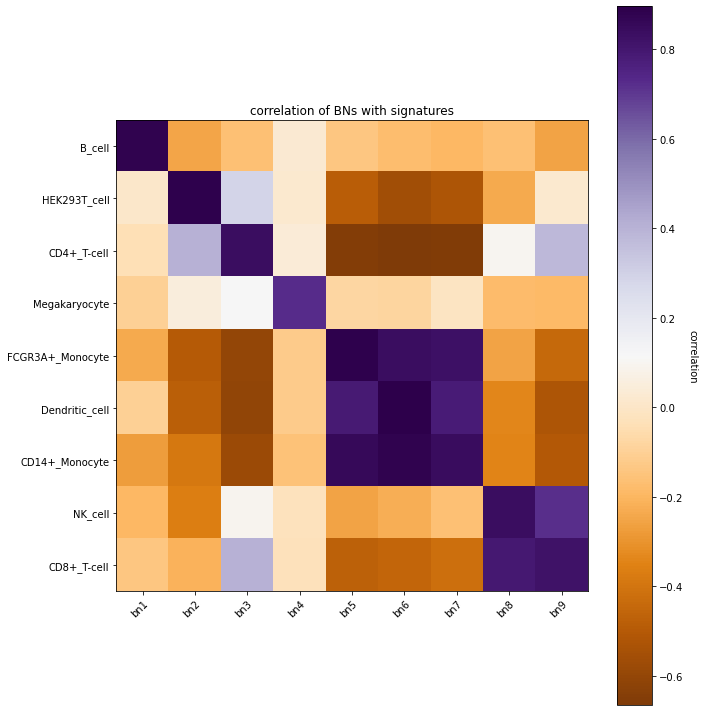

In [44]:
## cor BN with GSVA
# cor based on pseudopots only

bn_samp_np = x_sample_cell.cpu().detach().numpy()#x_encoded.cpu().detach().numpy()#mu_samp.cpu().detach().numpy()
#bn_all_np = mu_all.cpu().detach().numpy()
#bn_all_np = z_all.cpu().detach().numpy()
bn_df = pd.DataFrame(bn_samp_np)
bn_df.columns = ['bn'+str(i+1) for i in bn_df.columns]

bn_df.index =  arch_nn_spots_ct#np.concatenate((arch_spots, arch_spots_ct), axis=None)#dt.index


df1 = bn_df.loc[arch_nn_spots_ct,:]
df2 = gsva_scores1.loc[arch_nn_spots_ct,names]#gsva_scores1.loc[arch_nn_spots_ct,comp_df.index]#gsva_scores1.loc[arch_nn_spots_ct,valid_cell_dic_ct.keys()]
df=pd.concat([df1, df2], axis=1, keys=['df1', 'df2']).corr().loc['df2', 'df1']

fig, ax = plt.subplots()
#cor_bn_ct_df_marks_n = cor_bn_ct_df_marks.dropna(axis='columns')
#im = ax.imshow(df.divide(df.max(axis=1), axis=0),cmap="PuOr")#df/df.max(axis=1).values,#/df.max(axis=1),#/cor_bn_ct_df_marks_n.max(axis=0),

im = ax.imshow(df,cmap="PuOr")

cbar = ax.figure.colorbar(im, ax=ax)#, **cbar_kw
cbar.ax.set_ylabel('correlation', rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.rcParams["figure.figsize"] = (6, 6)

ax.set_title("correlation of BNs with signatures")
fig.tight_layout()
plt.show()

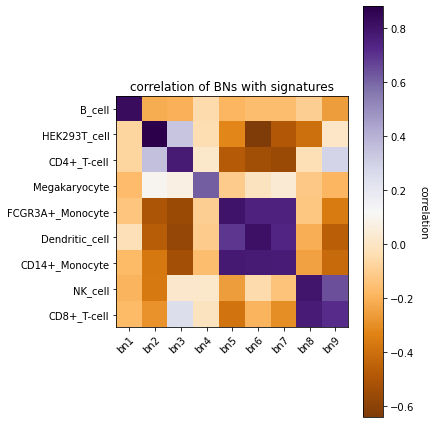

In [45]:
## cor BN with GSVA
# cor based on all spots


bn_all_np = x_encoded.cpu().detach().numpy()#mu_all.cpu().detach().numpy()
#bn_all_np = mu_all.cpu().detach().numpy()
#bn_all_np = z_all.cpu().detach().numpy()
bn_df = pd.DataFrame(bn_all_np)
bn_df.columns = ['bn'+str(i+1) for i in bn_df.columns]

bn_df.index = gsva_scores1.index


df1 = bn_df#.loc[arch_spots,:]
df2 = gsva_scores1[names]#gsva_scores1[comp_df.index]#gsva_scores1[valid_cell_dic_ct.keys()]#.loc[bn_df.index,:]
df=pd.concat([df1, df2], axis=1, keys=['df1', 'df2']).corr().loc['df2', 'df1']

fig, ax = plt.subplots()
#cor_bn_ct_df_marks_n = cor_bn_ct_df_marks.dropna(axis='columns')
#im = ax.imshow(df.divide(df.max(axis=1), axis=0),cmap="PuOr")#/df.max(axis=0),#/cor_bn_ct_df_marks_n.max(axis=0),
im = ax.imshow(df,cmap="PuOr")               

cbar = ax.figure.colorbar(im, ax=ax)#, **cbar_kw
cbar.ax.set_ylabel('correlation', rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.rcParams["figure.figsize"] = (8, 8)

ax.set_title("correlation of BNs with signatures")
fig.tight_layout()
plt.show()

In [46]:
bn_df.columns = names



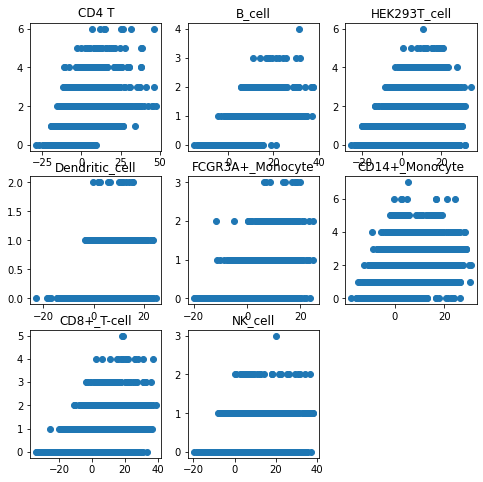

In [55]:

fig = plt.figure()

#plt.xlim(0, 1)
#plt.ylim(0, 1)
    
plt.subplot(3, 3, 1)
plt.scatter(bn_df['CD4+_T-cell'], comp_df_sele['CD4+_T-cell'])
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.title("CD4 T")

plt.subplot(3, 3, 2)
plt.scatter(bn_df['B_cell'], comp_df_sele['B_cell'])
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.title('B_cell')

plt.subplot(3, 3, 3)
plt.scatter(bn_df['HEK293T_cell'], comp_df_sele['HEK293T_cell'])
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.title("HEK293T_cell")

plt.subplot(3, 3, 4)
plt.scatter(bn_df['Dendritic_cell'], comp_df_sele['Dendritic_cell'])
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.title('Dendritic_cell')

plt.subplot(3, 3, 5)
plt.scatter(bn_df['FCGR3A+_Monocyte'], comp_df_sele['FCGR3A+_Monocyte'])
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.title('FCGR3A+_Monocyte')

plt.subplot(3, 3, 6)
plt.scatter(bn_df['CD14+_Monocyte'], comp_df_sele['CD14+_Monocyte'])
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.title('CD14+_Monocyte')

plt.subplot(3, 3, 7)
plt.scatter(bn_df['CD8+_T-cell'], comp_df_sele['CD8+_T-cell'])
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.title('CD8+_T-cell')

plt.subplot(3, 3, 8)
plt.scatter(bn_df['NK_cell'], comp_df_sele['NK_cell'])
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.title('NK_cell')

plt.show()

In [56]:
from scipy.special import softmax
mu_all_s = softmax(bn_df, axis=1)#softmax(mu_all.detach().numpy(), axis=1)#softmax(z_all.detach().numpy(), axis=1)#mu_all
#m
mu_all_s.sum(axis=1)

s1       1.000001
s2       1.000000
s3       1.000000
s4       1.000000
s5       1.000000
           ...   
s5996    1.000000
s5997    1.000000
s5998    1.000001
s5999    1.000000
s6000    1.000000
Length: 6000, dtype: float32

In [57]:
#df['New Col'] = df['Col A']/df['Col A'].sum()
comp_df_sele_t = comp_df_sele
comp_df_sele_t["sum"] = comp_df_sele_t.sum(axis=1)

comp_df_sele_s = comp_df_sele_t.div(comp_df_sele_t["sum"], axis=0)
comp_df_sele_s.sum(axis=1)

s1       2.0
s2       2.0
s3       2.0
s4       2.0
s5       2.0
        ... 
s5996    2.0
s5997    2.0
s5998    2.0
s5999    2.0
s6000    2.0
Length: 6000, dtype: float64

<AxesSubplot:>

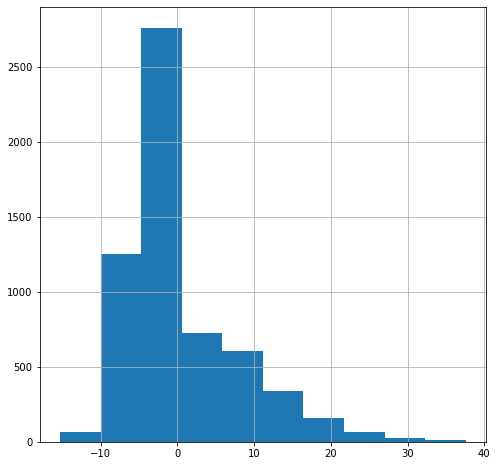

In [67]:
bn_df[names[0]].hist()

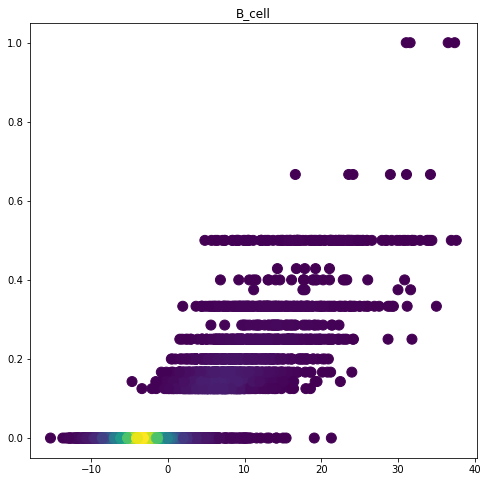

0.8420963218264382


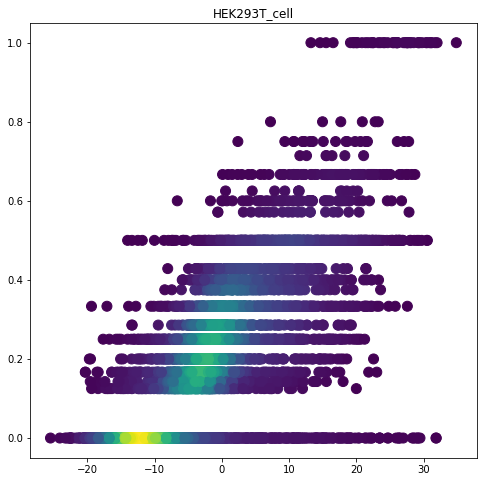

0.7189655648014496


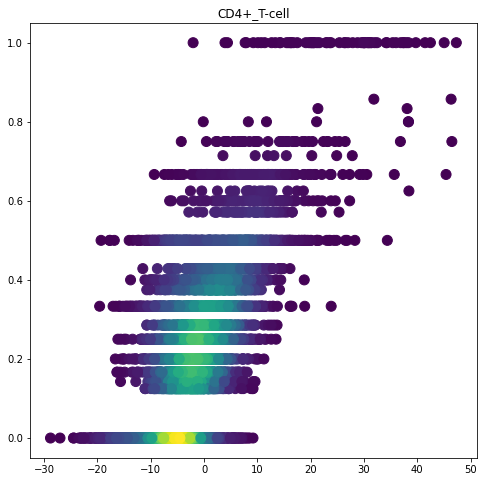

0.6311334284974061


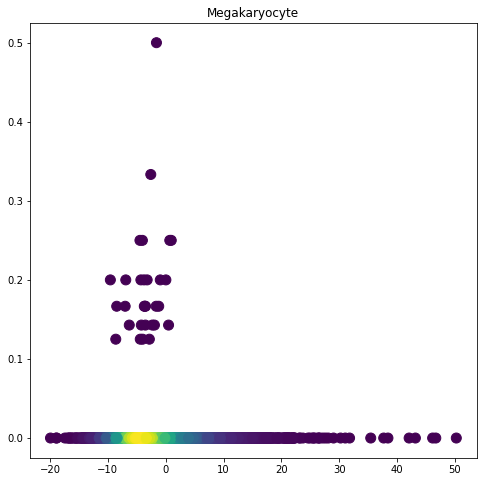

-0.017027460413479287


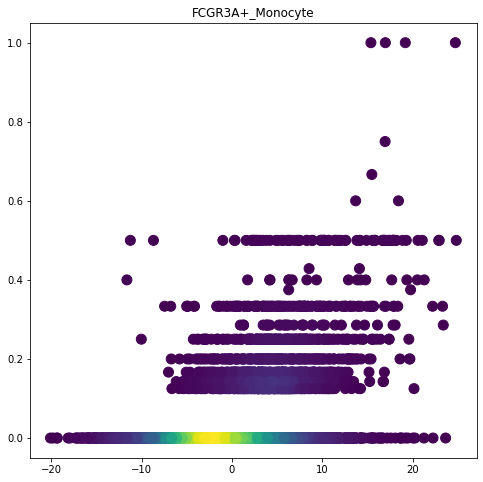

0.4647361642194928


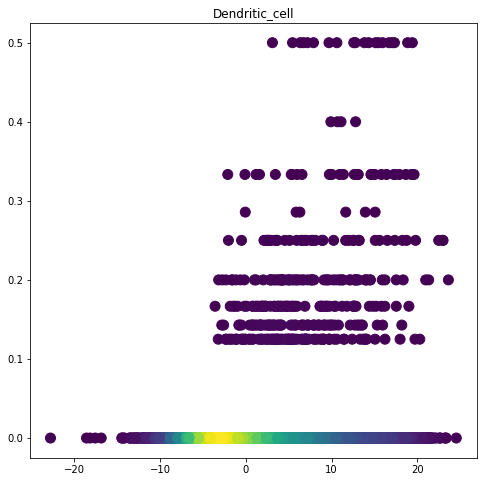

0.21462553539072476


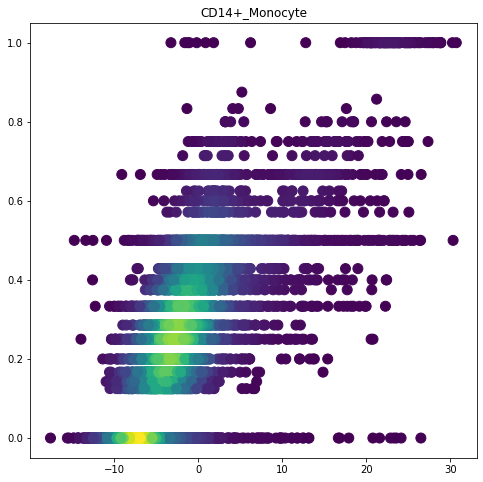

0.6911352993688671


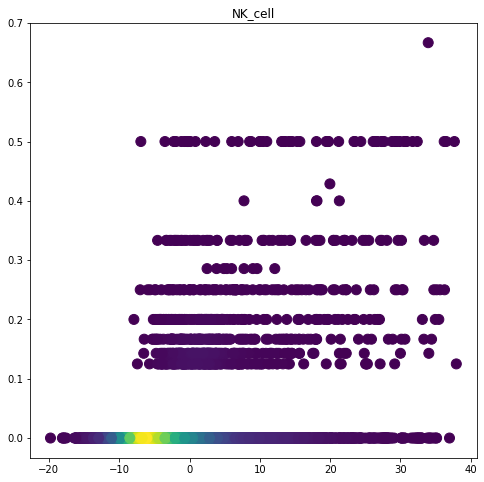

0.375440458024467


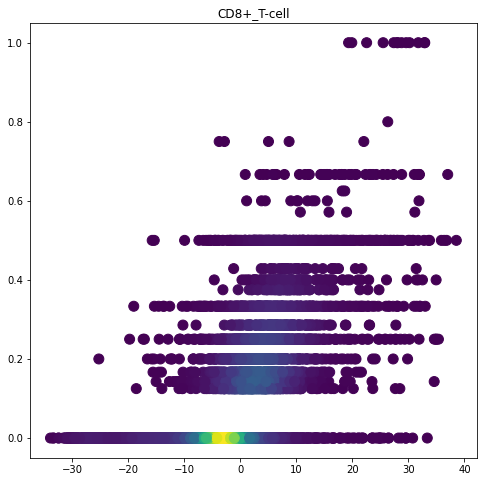

0.5750488499809941


In [64]:
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr

for ii in names:
    
    xx = bn_df[ii].values
    yy = comp_df_sele_s[ii].values
    yy=yy.astype(float)
#yy
    xy = np.vstack([xx,yy])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    ax.scatter(xx, yy, c=z, s=100)
    plt.title(ii)
    plt.show()
    
    corr, _ = pearsonr(xx,yy)
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
    print(corr)




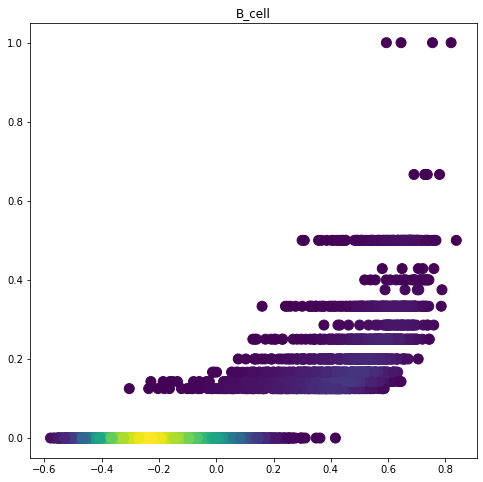

0.8142772106695191


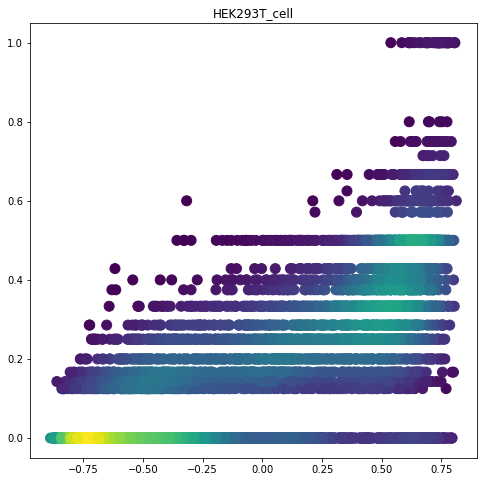

0.6687332623900759


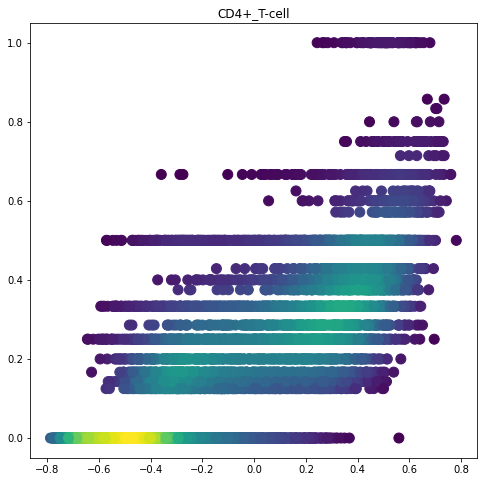

0.6934082537315116


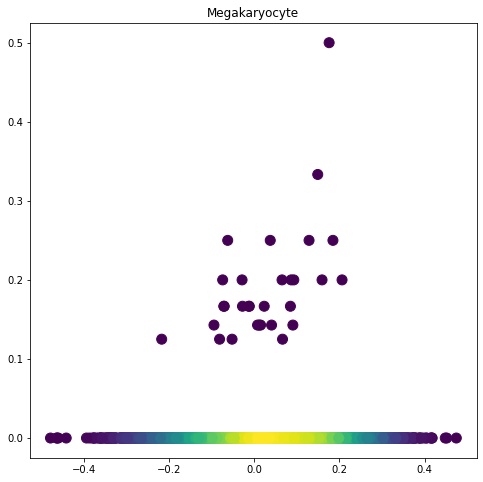

0.006937650248996488


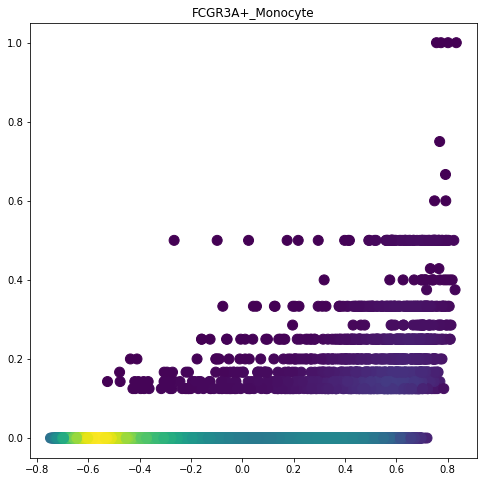

0.5354410117698558


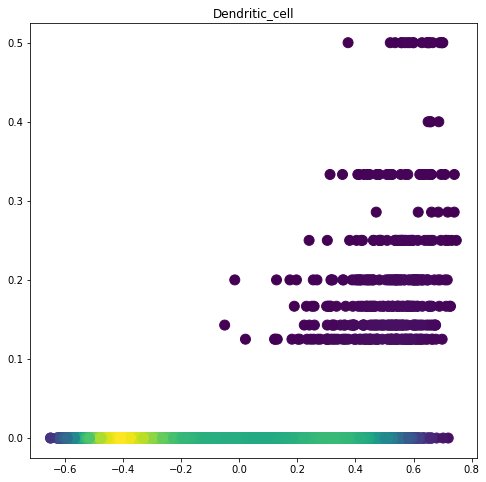

0.3512253875805434


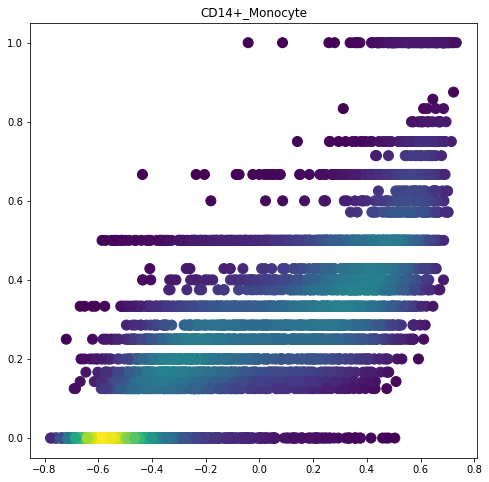

0.7620738514801895


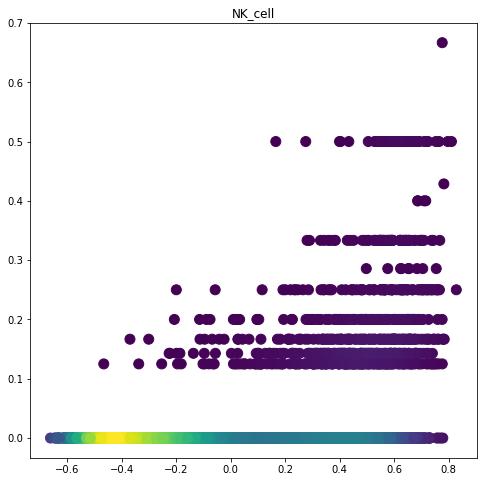

0.43884677608478173


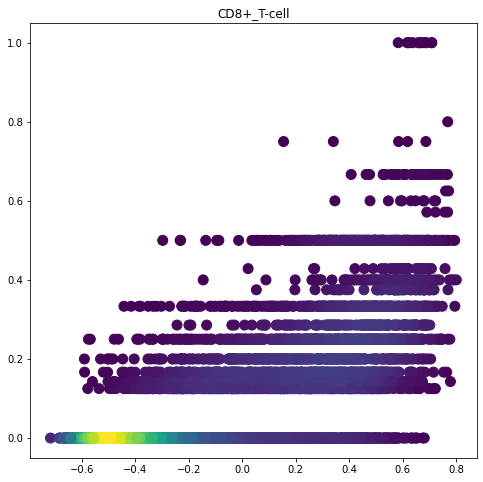

0.7050556227609615


In [66]:
for ii in names:
    
    xx = gsva_scores1[ii].values
    yy = comp_df_sele_s[ii].values
    yy=yy.astype(float)
#yy
    xy = np.vstack([xx,yy])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    ax.scatter(xx, yy, c=z, s=100)
    plt.title(ii)
    plt.show()
    
    corr, _ = pearsonr(xx,yy)
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
    print(corr)



0.8420963218264382
0.7189655648014496
0.6311334284974061
-0.017027460413479287
0.4647361642194928
0.21462553539072476
0.6911352993688671
0.375440458024467


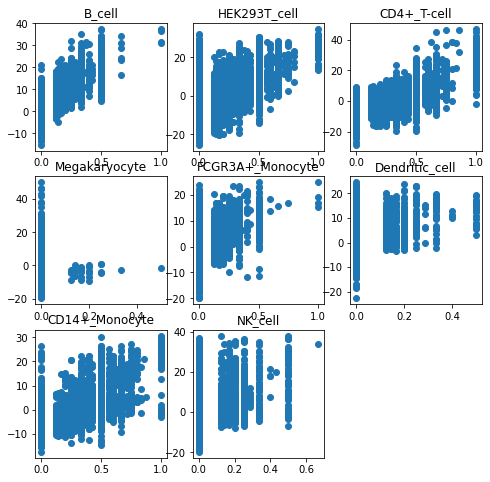

In [61]:
fig = plt.figure()

#plt.xlim(0, 1)
#plt.ylim(0, 1)
    
plt.subplot(3, 3, 1)
plt.scatter(comp_df_sele_s[names[0]],bn_df[names[0]])
plt.title(names[0])
corr, _ = pearsonr(comp_df_sele_s[names[0]],bn_df[names[0]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 2)
plt.scatter(comp_df_sele_s[names[1]],bn_df[names[1]])
plt.title(names[1])
corr, _ = pearsonr(comp_df_sele_s[names[1]],bn_df[names[1]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 3)
plt.scatter(comp_df_sele_s[names[2]],bn_df[names[2]])
plt.title(names[2])
corr, _ = pearsonr(comp_df_sele_s[names[2]],bn_df[names[2]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 4)
plt.scatter(comp_df_sele_s[names[3]],bn_df[names[3]])
plt.title(names[3])
corr, _ = pearsonr(comp_df_sele_s[names[3]],bn_df[names[3]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 5)
plt.scatter(comp_df_sele_s[names[4]],bn_df[names[4]])
plt.title(names[4])
corr, _ = pearsonr(comp_df_sele_s[names[4]],bn_df[names[4]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 6)
plt.scatter(comp_df_sele_s[names[5]],bn_df[names[5]])
plt.title(names[5])
corr, _ = pearsonr(comp_df_sele_s[names[5]],bn_df[names[5]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 7)
plt.scatter(comp_df_sele_s[names[6]],bn_df[names[6]])
plt.title(names[6])
corr, _ = pearsonr(comp_df_sele_s[names[6]],bn_df[names[6]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 8)
plt.scatter(comp_df_sele_s[names[7]],bn_df[names[7]])
plt.title(names[7])
corr, _ = pearsonr(comp_df_sele_s[names[7]],bn_df[names[7]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.show()

0.7263166166021751
0.5652124044238281
0.43158155145406785
-0.013536515250825304
0.36536602255431905
0.2326851224137551
0.4290908003247437
0.2613310958182988


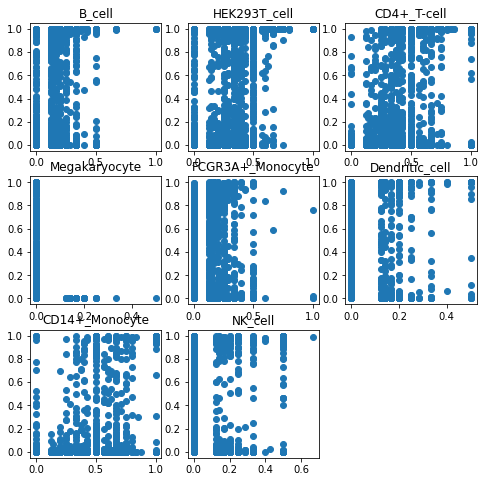

In [58]:
fig = plt.figure()

#plt.xlim(0, 1)
#plt.ylim(0, 1)
    
plt.subplot(3, 3, 1)
plt.scatter(comp_df_sele_s[names[0]],mu_all_s[names[0]])
plt.title(names[0])
corr, _ = pearsonr(comp_df_sele_s[names[0]],mu_all_s[names[0]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 2)
plt.scatter(comp_df_sele_s[names[1]],mu_all_s[names[1]])
plt.title(names[1])
corr, _ = pearsonr(comp_df_sele_s[names[1]],mu_all_s[names[1]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 3)
plt.scatter(comp_df_sele_s[names[2]],mu_all_s[names[2]])
plt.title(names[2])
corr, _ = pearsonr(comp_df_sele_s[names[2]],mu_all_s[names[2]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 4)
plt.scatter(comp_df_sele_s[names[3]],mu_all_s[names[3]])
plt.title(names[3])
corr, _ = pearsonr(comp_df_sele_s[names[3]],mu_all_s[names[3]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 5)
plt.scatter(comp_df_sele_s[names[4]],mu_all_s[names[4]])
plt.title(names[4])
corr, _ = pearsonr(comp_df_sele_s[names[4]],mu_all_s[names[4]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 6)
plt.scatter(comp_df_sele_s[names[5]],mu_all_s[names[5]])
plt.title(names[5])
corr, _ = pearsonr(comp_df_sele_s[names[5]],mu_all_s[names[5]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 7)
plt.scatter(comp_df_sele_s[names[6]],mu_all_s[names[6]])
plt.title(names[6])
corr, _ = pearsonr(comp_df_sele_s[names[6]],mu_all_s[names[6]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.subplot(3, 3, 8)
plt.scatter(comp_df_sele_s[names[7]],mu_all_s[names[7]])
plt.title(names[7])
corr, _ = pearsonr(comp_df_sele_s[names[7]],mu_all_s[names[7]])
#cov(comp_df_sele_s[names[0]],mu_all_s[names[0]])
print(corr)

plt.show()

In [ ]:
from scipy.stats import gaussian_kde
#plt.rcParams["figure.figsize"] = (30, 30)
ax = plt.gca()
for i in names:
    xx = mu_all_s[i]#.values#np.log1p(dt[i].values)
    yy = comp_df_sele_s[i]#.values
    xy = np.vstack([xx,yy])
    z = gaussian_kde(xy)(xy)
    
    ax.scatter(xx, yy, c=z, s=100)

In [ ]:
comp_df_sele = comp_df_sele.drop(columns=['sum'])
comp_df_sele_ss = softmax(comp_df_sele, axis=1)#softmax(mu_all.detach().numpy(), axis=1)#softmax(z_all.detach().numpy(), axis=1)#mu_all
#m
comp_df_sele_ss.sum(axis=1)

In [ ]:
plt.subplot()
plt.scatter(mu_all_s[:,2], dt['CD19'])#'FCGR3A'

#x_encoded,x_sample_cell,x_hat_all,x_samp_hat,z_all,z_samp,mu_all,std_all,mu_samp
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (9,9)
im = ax.imshow(z_samp.cpu().detach().numpy(),
               cmap="PuOr")



In [ ]:
plt.subplot()
plt.scatter(mu_all_s[:,4], dt['FCGR3A'])#'FCGR3A'

Text(684.4999999999999, 0.5, '')

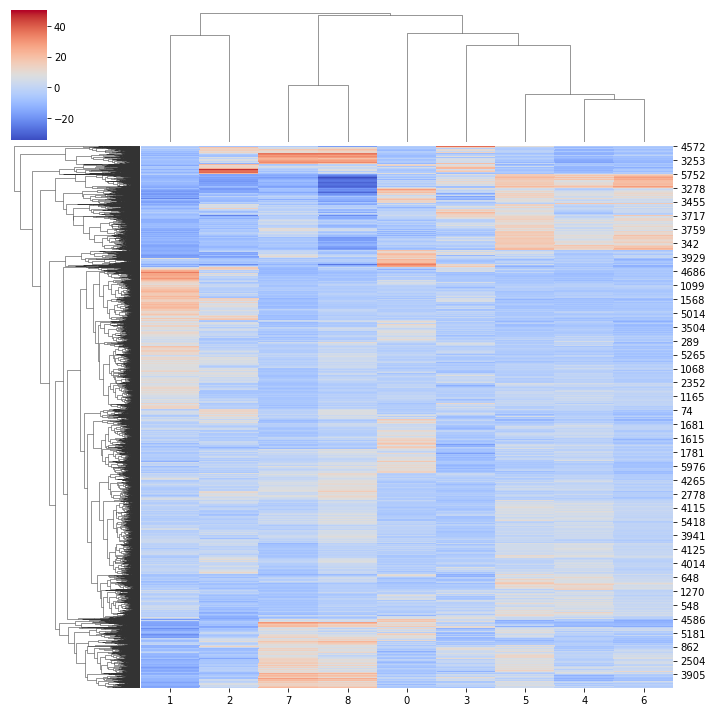

In [62]:
g=sns.clustermap(x_encoded.cpu().detach().numpy(),cmap='coolwarm')
ax = g.ax_heatmap
ax.set_ylabel("")

In [ ]:
for i in bn_df.columns:
    adata.obs[i] = bn_df[i].values
    sc.pl.umap(adata, color=i)